<h1 style="text-align: center; font-size: 40px">Graph Representations</h1>

### Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [1]:
import java.util.Random;
import java.lang.*;

## Objectives

The objectives of this worksheet are as follows:


*Note:* The graphs can be created with the following tools:

* [csacademy](https://csacademy.com/app/graph_editor/)
* [visalgo](https://visualgo.net/en/graphds)

It is **highly** suggested to play around with this tool in order to get a visual sense of how graphs are constructed.

#### Using Jupyter
A few things to remind you with regard to using this Jupyter environment:
1. If the platform crashes don't worry. All of this is in the browser so just refresh and all of your changes up to your last save should still be there. For this reason we encourage you to **save often**.
2. Be sure to run cells from top to bottom.
3. If you're getting weird errors to go: Kernel->Restart & Clear Output. From there, run cells from top to bottom.

<h2 style="text-align: center;">Graphs in General</h2>

<img style="text-align: center;" src="images/graph-types.png" alt="drawing" width="700"/>

### Review of  General Terms

When talking about graphs there are the following terms you will need to be familiar with:
* *Vertex* --> This is an individual point on a graph. In previous worksheets relating to linked lists and trees you will have heard these refered to as nodes.
* *Edge* --> This a connection between two nodes. In linked lists and trees these edges were represented using references to other nodes (e.g., `next`, `left`, `right`). However, as we will see today, there are many other ways of representing edges.
    * *Weight* --> Edges can have weight associated with them.  For example, if we are building a map of campus we could reprsent the distance between buildings through edge weight.
    * *Direction* --> Graphs can have edges that only allow for traversal to another node in a single direction (directed) or in both directions (undirected).
    
The image above shows the various combinations of directed and undirected graphs. 

<h2 style="text-align: center;">Graph Representations</h2>

There are two main ways in which to represent graphs, as matricies (refered to as an adjacency matrix) or as lists of lists (and adjacency list). We will only briefly touch upon the adjacency matrix as a means by which to represent graphs and instead spend the majority of our time discussing adjacency lists. This is due to the increased complexity of dynamically managing the size of an adjacency matrix when inserting and deleting new nodes.

<h3 style="text-align: center;">Adjacency Matrix</h3>

The adjacency matrix can simply be thought of as a 2d array of values which indicate whether two vertecies are connected by an edge. 

#### Example: Directed, Unweighted
Consider the following example of an unweighted, directed graph and it's associated adjacency matrix:
<br>
<br>

<div style="display: inline-block; text-align: center; margin: 0 auto; align-items: center; justify-content: center;">

<div style="width: 35%; float: left;">
    
![image.png](images/directed-unweighted-1.png)

</div>

<div style="width: 49%; float: left;">
    
| -  | a | b | c | d | e |
|:---:|:---:|:---:|:---:|:---:|---|
| a | 0 | 0 | 1 | 0 | 1 |
| b | 0 | 0 | 0 | 1 | 1 |
| c | 0 | 0 | 0 | 1 | 1 |
| d | 0 | 0 | 0 | 0 | 0 |
| e | 0 | 0 | 0 | 0 | 0 |

</div>

</div>

<br>

For our list representation the rows and columns can be thought of as referencing vertecies in the graph. More specifically, rows reference where the edge originates and columns reference where the edge ends. The values that populate the matrix are then used to represnt connections between these vertecies. Since this is an unweighted graph we will simply use $1$ to indicate the presence of an edge and $0$ to indicate the absence of one. This results in the following adjacency matrix for the previously seen figure.


#### Example: Weighted, Undirected

Now, consider the following weighted, undirected graph:
<br>
<br>

<div style="display: inline-block; text-align: center; margin: 0 auto; align-items: center; justify-content: center;">

<div style="width: 35%; float: left;">
    
![image.png](images/weighted-undirected.png)

</div>

<div style="width: 49%; float: left;">
    
| -  | a | b | c | d | e |
|:---:|:---:|:---:|:---:|:---:|---|
| a | 0 | 0 | 3 | 0 | 1 |
| b | 0 | 0 | 0 | 1 | 3 |
| c | 3 | 0 | 0 | 1 | -1 |
| d | 0 | 0 | 0 | 0 | 0 |
| e | 0 | 3 | -1 | 0 | 0 |

</div>

</div>

<br>


With our previous example we used 1 to represent all edges as they were unweighted. However, here we use the weight of the edge to represent the presence of a node. To avoid issues relating to edges that have 0 or negative weight, rather than using 0 or some other value to represent the absence of an edge we simply use `null` which is represented in the adj. matrix as a "-" character. As for the graph being undirected, we add add the edge weight to for both directions. Notice how the matrix is mirrored about the diagonal.


<img alt="Activity - In-Class" src="https://img.shields.io/badge/Activity-In--Class-E84A27" align="left" style="margin-right: 5px"/>
<br>
<br>

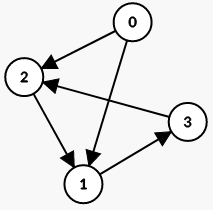
<br>
<center>
    Fig. 1: A simple directed, unweighted graph
</center>
<br>

Create a function that takes an vertex list and a node list that represents a __directed, unweighted__ graph (see above) and outputs it's adjacency matrix represent.

In [2]:
public void printAdjMatrix(List<Integer[]> vertexList, int vertexCount){
    
    //Step 1: Create a NxN matrix 
    int[][] matrix = new int[vertexCount][vertexCount];
    
    //Step 2: Populate the matrix
    for(Integer[] pair: vertexList){
        Integer start = pair[0];
        Integer end = pair[1];
        matrix[start][end] = 1;
    }
    
    //Step 3: Print the matrix 
    for(int r = 0; r < vertexCount; r++){
        for(int c = 0; c < vertexCount; c++){
            System.out.print(matrix[r][c]);
        }
        System.out.println();
    }
}

In [3]:
// Step 1) Setup the edge list
List<Integer []> vertList = new ArrayList<>();
vertList.add(new Integer[]{0, 2}); // This represents the edge 0->2
vertList.add(new Integer[]{0, 1}); 
vertList.add(new Integer[]{2, 1}); 
vertList.add(new Integer[]{1, 3}); 
vertList.add(new Integer[]{3, 2}); 

printAdjMatrix(vertList, 4)

0110
0001
0100
0010


If you implemented the above function correctly you should get the following output.
```
0110
0001
0100
0010
```
Spend a moment checking this against the original graph.

##### Outdegree and Indegree

There are many statistics that can be calculated that describe the structure or a graph and it's elements. Many of of them are rooted in the notion of a vertex's "degree". The degree of a vertex is determined by the number of edges that are associated with a vertex. There are two types of degree:
* __Indegree:__ The number of edges directed at a given vertex.
* __Outdegree:__ The number of edges that are directed out of a given veretx.

<img alt="Activity - In-Class" src="https://img.shields.io/badge/Activity-In--Class-E84A27" align="left" style="margin-right: 5px"/>
<br>
<br>


For the following directed graph's adjacency matrix create two functions, one that calculates and outputs the indegree of each vertex and one that does the same for outdegree. 
 

In [4]:
public int[] computeInDegree(int[][] adjMatrix){
    int[] inDegrees = new int[adjMatrix.length];
    for(int i = 0; i < adjMatrix.length; i++){
        for(int j = 0; j < adjMatrix.length; j++){
            inDegrees[i] += adjMatrix[i][j];
        }
    }
    return inDegrees;
}

In [5]:
public int[] computeOutDegree(int[][] adjMatrix){
    int[] outDegrees = new int[adjMatrix.length];
    for(int i = 0; i < adjMatrix.length; i++){
        for(int j = 0; j < adjMatrix.length; j++){
            outDegrees[i] += adjMatrix[j][i];
        }
    }
    return outDegrees;
}

In [6]:
/* Testing */

int[][] adjMatrix = {
{0, 1, 1, 0},
{0, 0, 1, 0},
{0, 0, 0, 1},
{0, 1, 0, 1}
};

int[] indegrees = computeInDegree(adjMatrix);
int[] outdegrees = computeOutDegree(adjMatrix);

System.out.printf("Indegree: %s\n", Arrays.toString(indegrees));
System.out.printf("Outdegree: %s\n", Arrays.toString(outdegrees));
;

Indegree: [2, 1, 1, 2]
Outdegree: [0, 2, 2, 2]


If your functions are implemented correctly you should have recieved the following output:
```
Indegree: [2, 1, 1, 2]
Outdegree: [0, 2, 2, 2]
```

<h2 style="text-align: center;">Adjacency List</h2>

Let's refer back to figure 1 and compare the adjacency matrix it produced to it's adjacency list representation:


| - | a | b | c | d |
|:---:|:---:|:---:|:---:|:---:|
| a | - | 1 | 1 | - |
| b | - | - | 1 | - |
| c | - | - | - | 1 |
| d | - | 1 | - | - |


The way to read the adjacency list is to find the starting vertex in the left column. The list of vertecies that are reachable from that vertex is then given by the list that is associated with it.



Adjacency lists are a bit more versitile than adjacency matrixcies for the following reasons:
* If you want to add a new vertex to an adjacency matrix you must resize the matrix which is an expensive and annoying thing to do. With a adjacency list all you need to do is add a new node.
* For adjacency matricies we store information on every potential edge rather than just on those that exist which leads to a O(V^2) space complexity where V is the number of vertecies. With adjacency matricies we only need to store information on edges that exist in the graph so our space complexity is O(E) where E is the number of edges in the graph.

It does have the one small disadvantage that we cannot directly check or access and edge in O(1) time. Instead we must locate the entry associated with a starting node and then search along the list containing the other vertecies which it shares an edge with.

For this example, let's create a directed, weighted graph using an adjacency list!

## Edge Class

As was the case with linked lists and trees we need a basic unit in which to hold our data. We will be using an edge class to store the following two attributes:

1. The desination vertex
2. The weight of the edge

We provide the override for the `equals` method. You will be using this indirectly through the `contains` method in your implementation of the `Digraph` class. As a quick walkthrough, this method takes an arbitrary object as a parameter. It first checks if the object is an instance of the `Edge` class and. If it is it then casts that parameter to an edge and checks if the current edge has an equal weight and destination to the one that was passed in. If it does it returns true. In any other case it returns false.

In [24]:
class Edge{
    
    private final String dest;
    private final Integer weight;
    
    Edge(String dest, int weight){
        this.dest = dest;
        this.weight = weight;
    }
    
    public String getDest(){
        return dest;
    }
    
    public int getWeight(){
        return weight;
    }
    
    @Override
    public boolean equals(Object o){
        if(o instanceof Edge){
            Edge e = (Edge) o;
            return this.dest.equals(e.dest) && this.weight.equals(e.weight);
        } else{
            return false;
        }
    }
}

In [8]:
/* Test our edge */
Edge e1 = new Edge("a", 10);

In [9]:
System.out.println(e1.getDest());

a


In [10]:
System.out.println(e1.getWeight());

10


## DiGraph


##### Adding a Vertex


##### Adding an Edge


##### Removing an Edge


##### Printing the Edge List

;

In [25]:
class Digraph{
    
    private Map<String, List<Edge>> map;
    
    Digraph(){
        map = new HashMap<>();
    }
    
    public void addVertex(String v){
        
        map.putIfAbsent(v, new LinkedList<>());
        
    }
    
    public void addEdge(String source, String dest, int weight){
        
        Edge newEdge = new Edge(dest, weight);
        if(map.get(source).contains(newEdge)){
            return;
        }
        map.get(source).add(newEdge);
        
    }
    
    public void removeEdge(String source, String dest){
    
        /* Step 1) Find the location of the edge with dest in source's list */
        int i = 0;
        List<Edge> edges = map.get(source);
        for(; i < edges.size(); i++){
            Edge e = edges.get(i);
            if(e.getDest().equals(dest)){
                break;
            }
        }
        
        /* Step 2) Remove the item at the location */
        map.get(source).remove(i);
    }
    
    public void printEdgeList(){
        
        for(String src: map.keySet()){
            for(Edge destEdge: map.get(src)){
                System.out.printf(" %s -> %s\n", src, destEdge.getDest());
            }
        }
    }
    
    public Map<String, List<Edge>> getMap(){
        return map;
    }
}

In [12]:
Digraph digraph = new Digraph();
digraph.addVertex("a");
digraph.addVertex("b");
digraph.addVertex("c");
digraph.addVertex("d");
digraph.addEdge("a", "b", 1);
digraph.addEdge("a", "c", 1);
digraph.addEdge("a", "d", 1);
digraph.removeEdge("a", "c");
digraph.printEdgeList();

 a -> b
 a -> d


##### Outdegree and Indegree

Similar to our exercise with adjacency matricies you will be tasked with calculating the in and out degree of vertecies from an adjacency matrix. Here are the definitions of in and out degree with respect to adjacency lists:
* __Indegree__: This should be the number of times a vertex appears in an other vertecies associated adjacency list.
* __Outdegree__: This is the number of vertecies that appear in a given vertex's adjacency list.

<img alt="Activity - In-Class" src="https://img.shields.io/badge/Activity-In--Class-E84A27" align="left" style="margin-right: 5px"/>
<br>
<br>


For the following directed graph's adjacency matrix create two functions, one that calculates and outputs the indegree of each vertex and one that does the same for outdegree. 
 

In [13]:
public Map<String, Integer> computeOutDegree(Digraph graph){
    Map<String, Integer> indegree = new HashMap<>();
    Map<String, List<Edge>> adjList = graph.getMap();
    for(String vertex: adjList.keySet()){
        indegree.put(vertex, adjList.get(vertex).size());
    }
    return indegree;
}

In [14]:
public Map<String, Integer> computeInDegree(Digraph graph){

    Map<String, List<Edge>> adjList = graph.getMap();
    Map<String, Integer> indegree = new HashMap<>();
    
    /* Step 1: Initialize our indegree map to contain all vertecies and initial indegrees of 0 */
    for(String vertex: adjList.keySet()){
        indegree.put(vertex, 0);
    }
    
    
    /* Step 2: count instances of the vertecies appearing in other vertecies associated lists */
    for(String vertex: adjList.keySet()){
        for(Edge edge: adjList.get(vertex)){
            String dest = edge.getDest();
            indegree.put(dest, indegree.get(dest) + 1);
        }
    }
    
    return indegree;
}

In [26]:
/* Testing */

Digraph digraph = new Digraph();
digraph.addVertex("a");
digraph.addVertex("b");
digraph.addVertex("c");
digraph.addVertex("d");
digraph.addEdge("a", "b", 1);
digraph.addEdge("a", "c", 1);
digraph.addEdge("c", "a", 1);
digraph.addEdge("c", "a", 1);
digraph.addEdge("c", "a", 1);
digraph.addEdge("a", "d", 1);

Map<String, Integer> indegrees = computeInDegree(digraph);
Map<String, Integer> outdegrees = computeOutDegree(digraph);

System.out.printf("Indegree: %s\n", indegrees);
System.out.printf("Outdegree: %s\n", outdegrees);
;

Indegree: {a=1, b=1, c=1, d=1}
Outdegree: {a=3, b=0, c=1, d=0}


If your functions are implemented correctly you should have recieved the following output:
```
Indegree: {a=0, b=1, c=1, d=1}
Outdegree: {a=3, b=0, c=0, d=0}

```